In [1]:
from PIL import Image


In [4]:
path = "/datasets/ffhq/images1024x1024/01919.png"

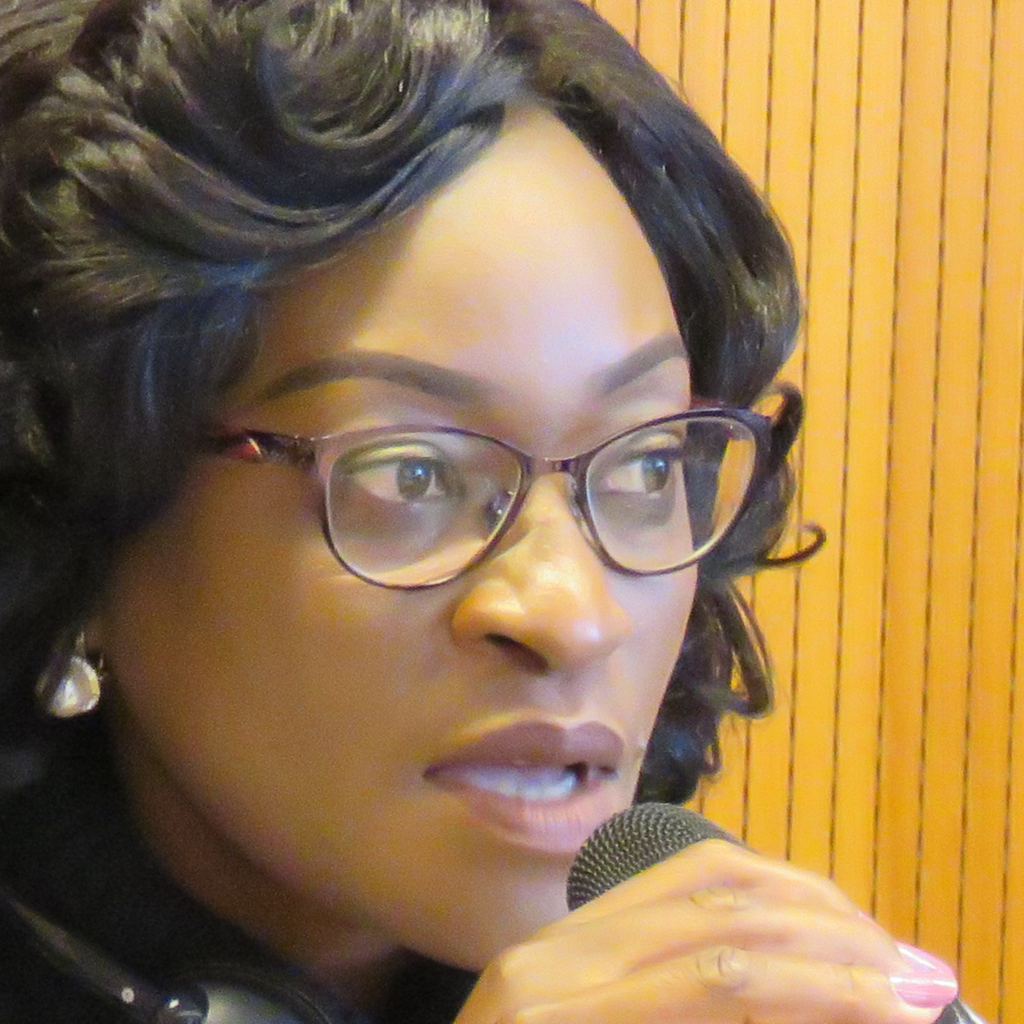

In [5]:
img = Image.open(path)
img

In [ ]:
# from losses.clip_loss import CLIPLoss

# device = "cuda"
# clip_models=["ViT-B/16"]
# print("Loading CLIP")
# clip_loss_models = {model_name: CLIPLoss(device,clip_model=model_name) for model_name in clip_models}
# print("Loaded CLIP")

# model = clip_loss_models["ViT-B/16"]
# img_encoder = model.model.visual


In [5]:
import torch

In [1]:
import vision_aided_loss

In [2]:
device='cuda'
discr = vision_aided_loss.Discriminator(cv_type='clip', loss_type='multilevel_sigmoid_s', device=device).to(device)
discr.cv_ensemble.requires_grad_(False) # Freeze feature extractor

In [8]:
discr(a)

tensor([[2.0993],
        [2.0861]], device='cuda:0', grad_fn=<AddBackward0>)

In [19]:
discr.cv_ensemble.models[0](a)[0].shape

torch.Size([2, 768, 7, 7])

In [20]:
a = torch.randn(9,3,1024,1024)

In [21]:
inds = torch.randint(0,9,(4,))

In [32]:
c = a[inds]

In [3]:
discr

Discriminator(
  (cv_ensemble): CVBackbone()
  (loss_type): losses_list()
  (decoder): ModuleList(
    (0): MultiLevelDViT(
      (decoder): ModuleList(
        (0): Sequential(
          (0): Identity()
          (1): Conv2d(768, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (2): LeakyReLU(negative_slope=0.2, inplace=True)
          (3): BlurPool(
            (pad): ZeroPad2d(padding=[1, 1, 1, 1], value=0.0)
          )
          (4): Conv2d(256, 1, kernel_size=(1, 1), stride=(2, 2))
        )
        (1): Sequential(
          (0): Identity()
          (1): Conv2d(768, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (2): LeakyReLU(negative_slope=0.2, inplace=True)
          (3): BlurPool(
            (pad): ZeroPad2d(padding=[1, 1, 1, 1], value=0.0)
          )
          (4): Conv2d(256, 1, kernel_size=(1, 1), stride=(2, 2))
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=256, bias=True)
          (1): Leaky

In [6]:
a = torch.randn(2,3,1024,1024).cuda()

In [ ]:


# Sample images
real = sample_real_image()
fake = G.forward(z)

# Update discriminator discr
lossD = discr(real, for_real=True) + discr(fake, for_real=False)
lossD.backward()

# Update generator G
lossG = discr(fake, for_G=True)
lossG.backward()


In [1]:
import torch
import vision_module

In [2]:
cv_models_list=None
if cv_models_list is None:
    cv_models_list = [
        'input-swin-output-pool',
        'input-clip-output-pool',
        'input-dino-output-pool',
        'input-vgg-output-pool',
        'input-seg_ade-output-pool',
        'input-det_coco-output-pool',
        'input-face_seg-output-pool',
        'input-face_normals-output-pool',
    ]

In [3]:
data_loader_kwargs = {'pin_memory': True, 'num_workers': 1, 'prefetch_factor': 2}


In [15]:
cv = 'input-clip-output-pool'
device = "cuda"
print("$$$$$$$$$$$$$$$$", cv, "$$$$$$$$$$$$$$$$")

class_name = 'vision_module.cvmodel.CVBackbone'

output_type = cv.split('output-')[1]
cv_type = cv.split('-output')[0].split('input-')[1]

$$$$$$$$$$$$$$$$ input-clip-output-pool $$$$$$$$$$$$$$$$


In [8]:
!ls vision_module


cv_discriminator.py  DiffAugment_pytorch.py  __pycache__
cvmodel.py	     __init__.py


In [13]:
from vision_module.cvmodel import CVBackbone

In [16]:
cv_ensemble = CVBackbone(cv_type= cv_type, output_type = output_type, diffaug = False, device=device).requires_grad_(False).to(device)
policy = ''


In [31]:
clip_backbone = cv_ensemble.models[0]

In [32]:
clip_backbone.__dict__

{'training': True,
 '_parameters': OrderedDict(),
 '_buffers': OrderedDict(),
 '_non_persistent_buffers_set': set(),
 '_backward_hooks': OrderedDict(),
 '_forward_hooks': OrderedDict(),
 '_forward_pre_hooks': OrderedDict(),
 '_state_dict_hooks': OrderedDict(),
 '_load_state_dict_pre_hooks': OrderedDict(),
 '_modules': OrderedDict([('model',
               VisionTransformer(
                 (conv1): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
                 (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
                 (transformer): Transformer(
                   (resblocks): Sequential(
                     (0): ResidualAttentionBlock(
                       (attn): MultiheadAttention(
                         (out_proj): _LinearWithBias(in_features=768, out_features=768, bias=True)
                       )
                       (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
                       (mlp): Sequential(
         

In [36]:
out = clip_backbone(a)

In [37]:
out.shape

torch.Size([2, 512])